In this notebook, we'll be building a simple simulation of points connected through springs (inspired by [this paper](https://arxiv.org/pdf/1910.00935.pdf)).

Let's first define a triangle of points, as well as springs that connect the points.

In [1]:
import numpy as np

x = np.array([[0., 0.],
              [1., 0.],
              [0, -1.]])

spring_anchors = np.array([[0, 1],
                           [1, 2],
                           [2, 0]])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
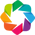

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
   .Curve.III :Curve   [x]   (y)
   .Labels.I  :Labels   [x,y]   (text)

In [2]:
import holoviews as hv
hv.extension('bokeh', 'matplotlib')

def plot_points(x, spring_anchors):
    """Plots all x as 2D points, connected by springs indicated by spring_anchors."""
    lines = []
    for i in range(spring_anchors.shape[0]):
        a, b = spring_anchors[i]
        lines.append(hv.Curve(x[[a, b], :]))
    lines = hv.Overlay(lines)
    scatter = hv.Scatter((x[:, 0], x[:, 1])).opts(hv.opts.Scatter(size=30, padding=0.2))
    labels = hv.Labels({('x', 'y'): x, 'text': [str(n) for n in range(x.shape[0])]}, ['x', 'y'], 'text')
    return scatter * lines * labels

plot_points(x, spring_anchors)

Now, we're going to define springs parameters and masses.

In [3]:
spring_stiffnesses = [2., 2., 2.]
spring_lengths = [.5, .5, .5]
masses = np.ones_like(spring_stiffnesses)

To move the particles, we need to add the spring forces to a force vector and step it forward in time.

Let's first do the force computation.

In [4]:
def compute_spring_forces(x, spring_anchors, spring_lengths, spring_stiffnesses):
    """Computes the spring forces."""
    forces = np.zeros_like(x)
    for i in range(spring_anchors.shape[0]):
        a, b = spring_anchors[i]
        x_a, x_b = x[a], x[b]
        dist = x_a - x_b
        length = np.linalg.norm(dist) + 1e-4
        F = (length - spring_lengths[i]) * spring_stiffnesses[i] * dist / length
        forces[a] += -F
        forces[b] += F
    return forces

forces = compute_spring_forces(x, spring_anchors, spring_lengths, spring_stiffnesses)
forces

array([[ 1.00009999, -1.00009999],
       [-2.29304321, -1.29294322],
       [ 1.29294322,  2.29304321]])

Now, let's write the time integrator:

In [5]:
def time_step_integration(x, v, forces, masses, dt, damping):
    """Integrates the forces using semi-implicit Euler time integration with damping."""
    s = np.exp(-dt * damping) 
    v_new = s * v + dt * forces / masses.reshape(-1, 1)
    x_new = x + dt * v_new
    return x_new, v_new

v = np.zeros_like(x)

time_step_integration(x, v, forces, masses, dt=0.1, damping=0.1)

(array([[ 0.010001  , -0.010001  ],
        [ 0.97706957, -0.01292943],
        [ 0.01292943, -0.97706957]]), array([[ 0.10001   , -0.10001   ],
        [-0.22930432, -0.12929432],
        [ 0.12929432,  0.22930432]]))

We can write the forward program:

In [6]:
def forward(x, steps=200, dt=0.5, damping=0.1):
    new_x = x.copy()
    new_v = np.zeros_like(x)
    snapshots = []
    snapshots.append(new_x.copy())
    for t in range(steps):
        forces = compute_spring_forces(new_x, spring_anchors, spring_lengths, spring_stiffnesses)
        new_x, new_v = time_step_integration(new_x, new_v, forces, masses, dt=dt, damping=damping)
        snapshots.append(new_x.copy())
    return snapshots

snapshots = forward(x)
plot_points(snapshots[-1], spring_anchors)

:Overlay
   .Scatter.I :Scatter   [x]   (y)
   .Curve.I   :Curve   [x]   (y)
   .Curve.II  :Curve   [x]   (y)
   .Curve.III :Curve   [x]   (y)
   .Labels.I  :Labels   [x,y]   (text)

We can also show some of the coordinate plots over time.

In [7]:
def make_time_plots(snapshots, node_number):
    return hv.Curve([snapshot[node_number, 0] for snapshot in snapshots], 
             label='node{}_x'.format(node_number), kdims='time', vdims='coordinate') * \
           hv.Curve([snapshot[node_number, 1] for snapshot in snapshots], 
             label='node{}_y'.format(node_number), kdims='time', vdims='coordinate')

make_time_plots(snapshots, 0)

:Overlay
   .Curve.Node0_x :Curve   [time]   (coordinate)
   .Curve.Node0_y :Curve   [time]   (coordinate)

With all that done, we can now do an animation showing the spring evolution over time.

In [8]:
def make_animation(snapshots, n_frames):
    hmap = hv.HoloMap({i: plot_points(snapshots[i], spring_anchors) for i in range(0, len(snapshots), n_frames)}, 
                      kdims=['snapshot'])
    return hv.output(hmap, holomap='scrubber')

make_animation(snapshots, 5)

:HoloMap   [snapshot]
   :Overlay
      .Scatter.I :Scatter   [x]   (y)
      .Curve.I   :Curve   [x]   (y)
      .Curve.II  :Curve   [x]   (y)
      .Curve.III :Curve   [x]   (y)
      .Labels.I  :Labels   [x,y]   (text)

As can be seen in the above, the simulation stabilizes after some initial jiggling. This is due to the fact that the spring lengths set initially induce back and forth oscillations of the structure.

# Random network of springs 

Of course, this framework can be applied to different situations, such as a randomly connected network of springs.

In [9]:
n_particles = 10
x = np.c_[np.random.uniform(0.05, 0.3, size=n_particles), 
          np.random.uniform(0.05, 0.3, size=n_particles)]
n_springs = 20
spring_anchors = np.c_[np.random.choice(np.arange(n_particles), size=n_springs), 
                       np.random.choice(np.arange(n_particles), size=n_springs)]
                           
spring_stiffnesses = np.ones((n_springs,))
spring_lengths = np.random.uniform(low=0.1, high=0.2, size=n_springs)
masses = np.ones_like(n_particles)
snapshots = forward(x, steps=100, dt=0.5, damping=0.2)

In [10]:
plot_points(snapshots[-1], spring_anchors)

:Overlay
   .Scatter.I   :Scatter   [x]   (y)
   .Curve.I     :Curve   [x]   (y)
   .Curve.II    :Curve   [x]   (y)
   .Curve.III   :Curve   [x]   (y)
   .Curve.IV    :Curve   [x]   (y)
   .Curve.V     :Curve   [x]   (y)
   .Curve.VI    :Curve   [x]   (y)
   .Curve.VII   :Curve   [x]   (y)
   .Curve.VIII  :Curve   [x]   (y)
   .Curve.IX    :Curve   [x]   (y)
   .Curve.X     :Curve   [x]   (y)
   .Curve.XI    :Curve   [x]   (y)
   .Curve.XII   :Curve   [x]   (y)
   .Curve.XIII  :Curve   [x]   (y)
   .Curve.XIV   :Curve   [x]   (y)
   .Curve.XV    :Curve   [x]   (y)
   .Curve.XVI   :Curve   [x]   (y)
   .Curve.XVII  :Curve   [x]   (y)
   .Curve.XVIII :Curve   [x]   (y)
   .Curve.XIX   :Curve   [x]   (y)
   .Curve.XX    :Curve   [x]   (y)
   .Labels.I    :Labels   [x,y]   (text)

In [11]:
make_time_plots(snapshots, 0)

:Overlay
   .Curve.Node0_x :Curve   [time]   (coordinate)
   .Curve.Node0_y :Curve   [time]   (coordinate)

In [12]:
make_animation(snapshots, 5)

:HoloMap   [snapshot]
   :Overlay
      .Scatter.I   :Scatter   [x]   (y)
      .Curve.I     :Curve   [x]   (y)
      .Curve.II    :Curve   [x]   (y)
      .Curve.III   :Curve   [x]   (y)
      .Curve.IV    :Curve   [x]   (y)
      .Curve.V     :Curve   [x]   (y)
      .Curve.VI    :Curve   [x]   (y)
      .Curve.VII   :Curve   [x]   (y)
      .Curve.VIII  :Curve   [x]   (y)
      .Curve.IX    :Curve   [x]   (y)
      .Curve.X     :Curve   [x]   (y)
      .Curve.XI    :Curve   [x]   (y)
      .Curve.XII   :Curve   [x]   (y)
      .Curve.XIII  :Curve   [x]   (y)
      .Curve.XIV   :Curve   [x]   (y)
      .Curve.XV    :Curve   [x]   (y)
      .Curve.XVI   :Curve   [x]   (y)
      .Curve.XVII  :Curve   [x]   (y)
      .Curve.XVIII :Curve   [x]   (y)
      .Curve.XIX   :Curve   [x]   (y)
      .Curve.XX    :Curve   [x]   (y)
      .Labels.I    :Labels   [x,y]   (text)

# A structured network of springs 

What about a structured network of springs?

In [13]:
x = np.c_[[0, 1, 2, 3, 4, 0, 1, 2, 3, 4], 
          [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]].astype(np.float)
spring_anchors = []
for node in range(4):
    # right neighbor bottom
    spring_anchors.append(np.array([node, node + 1]))
    # right neightbor top
    spring_anchors.append(np.array([node + 5, node + 6]))
    # upward diagonal right
    spring_anchors.append(np.array([node, node + 6]))
    # downward diagnoal right
    spring_anchors.append(np.array([node+1, node + 5]))
    # top down
    spring_anchors.append(np.array([node, node + 5]))
spring_anchors.append(np.array([4, 9]))
spring_anchors = np.array(spring_anchors)    
n_springs = spring_anchors.shape[0]
spring_stiffnesses = np.ones((n_springs,))
spring_lengths = np.ones((n_springs,))
masses = np.ones_like(x.shape[0])
snapshots = forward(x, steps=100, damping=0.1)

In [14]:
plot_points(snapshots[0], spring_anchors)

:Overlay
   .Scatter.I   :Scatter   [x]   (y)
   .Curve.I     :Curve   [x]   (y)
   .Curve.II    :Curve   [x]   (y)
   .Curve.III   :Curve   [x]   (y)
   .Curve.IV    :Curve   [x]   (y)
   .Curve.V     :Curve   [x]   (y)
   .Curve.VI    :Curve   [x]   (y)
   .Curve.VII   :Curve   [x]   (y)
   .Curve.VIII  :Curve   [x]   (y)
   .Curve.IX    :Curve   [x]   (y)
   .Curve.X     :Curve   [x]   (y)
   .Curve.XI    :Curve   [x]   (y)
   .Curve.XII   :Curve   [x]   (y)
   .Curve.XIII  :Curve   [x]   (y)
   .Curve.XIV   :Curve   [x]   (y)
   .Curve.XV    :Curve   [x]   (y)
   .Curve.XVI   :Curve   [x]   (y)
   .Curve.XVII  :Curve   [x]   (y)
   .Curve.XVIII :Curve   [x]   (y)
   .Curve.XIX   :Curve   [x]   (y)
   .Curve.XX    :Curve   [x]   (y)
   .Curve.XXI   :Curve   [x]   (y)
   .Labels.I    :Labels   [x,y]   (text)

In [15]:
make_time_plots(snapshots, 0)

:Overlay
   .Curve.Node0_x :Curve   [time]   (coordinate)
   .Curve.Node0_y :Curve   [time]   (coordinate)

In [16]:
make_animation(snapshots, 5)

:HoloMap   [snapshot]
   :Overlay
      .Scatter.I   :Scatter   [x]   (y)
      .Curve.I     :Curve   [x]   (y)
      .Curve.II    :Curve   [x]   (y)
      .Curve.III   :Curve   [x]   (y)
      .Curve.IV    :Curve   [x]   (y)
      .Curve.V     :Curve   [x]   (y)
      .Curve.VI    :Curve   [x]   (y)
      .Curve.VII   :Curve   [x]   (y)
      .Curve.VIII  :Curve   [x]   (y)
      .Curve.IX    :Curve   [x]   (y)
      .Curve.X     :Curve   [x]   (y)
      .Curve.XI    :Curve   [x]   (y)
      .Curve.XII   :Curve   [x]   (y)
      .Curve.XIII  :Curve   [x]   (y)
      .Curve.XIV   :Curve   [x]   (y)
      .Curve.XV    :Curve   [x]   (y)
      .Curve.XVI   :Curve   [x]   (y)
      .Curve.XVII  :Curve   [x]   (y)
      .Curve.XVIII :Curve   [x]   (y)
      .Curve.XIX   :Curve   [x]   (y)
      .Curve.XX    :Curve   [x]   (y)
      .Curve.XXI   :Curve   [x]   (y)
      .Labels.I    :Labels   [x,y]   (text)

# Adding some gravity and fixed nodes 

One way we can make this system more interesting is to add some more forces to it, set some nodes to be fixed and let it move according to its dynamics.

In [17]:
def compute_gravity_forces(x, masses, g):
    """Adds a vertical force to node with mass m."""
    forces = np.zeros_like(x)
    forces[:, 1] -= masses * g
    return forces

def forward_with_gravity_and_fixed_nodes(x, steps=200, dt=0.5, damping=0.1, g=0.1, fixed_nodes=None):
    new_x = x.copy()
    new_v = np.zeros_like(x)
    snapshots = []
    snapshots.append(new_x.copy())
    for t in range(steps):
        forces = compute_spring_forces(new_x, spring_anchors, spring_lengths, spring_stiffnesses)
        forces += compute_gravity_forces(new_x, masses, g)
        if fixed_nodes is not None:
            forces[fixed_nodes] = 0
        new_x, new_v = time_step_integration(new_x, new_v, forces, masses, dt=dt, damping=damping)
        snapshots.append(new_x.copy())
    return snapshots

In [18]:
x = np.c_[[0, 1, 2, 3, 4, 0, 1, 2, 3, 4], 
          [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]].astype(np.float)

spring_anchors = []
for node in range(4):
    # right neighbor bottom
    spring_anchors.append(np.array([node, node + 1]))
    # right neightbor top
    spring_anchors.append(np.array([node + 5, node + 6]))
    # upward diagonal right
    spring_anchors.append(np.array([node, node + 6]))
    # downward diagnoal right
    spring_anchors.append(np.array([node+1, node + 5]))
    # top down
    spring_anchors.append(np.array([node, node + 5]))
spring_anchors.append(np.array([4, 9]))
spring_anchors = np.array(spring_anchors)    

n_springs = spring_anchors.shape[0]
spring_stiffnesses = []
spring_lengths = []
for i in range(n_springs):
    a, b = spring_anchors[i]
    x_a, x_b = x[a], x[b]
    dist = x_a - x_b
    length = np.linalg.norm(dist) 
    spring_lengths.append(length)
    spring_stiffnesses.append(10 * length)
masses = 2 * np.ones_like(x.shape[0])

snapshots = forward_with_gravity_and_fixed_nodes(x, steps=300, dt=0.25, fixed_nodes=[5, 0], g=0.1, damping=0.1)

plot_points(snapshots[-1], spring_anchors)

:Overlay
   .Scatter.I   :Scatter   [x]   (y)
   .Curve.I     :Curve   [x]   (y)
   .Curve.II    :Curve   [x]   (y)
   .Curve.III   :Curve   [x]   (y)
   .Curve.IV    :Curve   [x]   (y)
   .Curve.V     :Curve   [x]   (y)
   .Curve.VI    :Curve   [x]   (y)
   .Curve.VII   :Curve   [x]   (y)
   .Curve.VIII  :Curve   [x]   (y)
   .Curve.IX    :Curve   [x]   (y)
   .Curve.X     :Curve   [x]   (y)
   .Curve.XI    :Curve   [x]   (y)
   .Curve.XII   :Curve   [x]   (y)
   .Curve.XIII  :Curve   [x]   (y)
   .Curve.XIV   :Curve   [x]   (y)
   .Curve.XV    :Curve   [x]   (y)
   .Curve.XVI   :Curve   [x]   (y)
   .Curve.XVII  :Curve   [x]   (y)
   .Curve.XVIII :Curve   [x]   (y)
   .Curve.XIX   :Curve   [x]   (y)
   .Curve.XX    :Curve   [x]   (y)
   .Curve.XXI   :Curve   [x]   (y)
   .Labels.I    :Labels   [x,y]   (text)

In [19]:
make_time_plots(snapshots, 4)

:Overlay
   .Curve.Node4_x :Curve   [time]   (coordinate)
   .Curve.Node4_y :Curve   [time]   (coordinate)

In [20]:
make_animation(snapshots, 15)

:HoloMap   [snapshot]
   :Overlay
      .Scatter.I   :Scatter   [x]   (y)
      .Curve.I     :Curve   [x]   (y)
      .Curve.II    :Curve   [x]   (y)
      .Curve.III   :Curve   [x]   (y)
      .Curve.IV    :Curve   [x]   (y)
      .Curve.V     :Curve   [x]   (y)
      .Curve.VI    :Curve   [x]   (y)
      .Curve.VII   :Curve   [x]   (y)
      .Curve.VIII  :Curve   [x]   (y)
      .Curve.IX    :Curve   [x]   (y)
      .Curve.X     :Curve   [x]   (y)
      .Curve.XI    :Curve   [x]   (y)
      .Curve.XII   :Curve   [x]   (y)
      .Curve.XIII  :Curve   [x]   (y)
      .Curve.XIV   :Curve   [x]   (y)
      .Curve.XV    :Curve   [x]   (y)
      .Curve.XVI   :Curve   [x]   (y)
      .Curve.XVII  :Curve   [x]   (y)
      .Curve.XVIII :Curve   [x]   (y)
      .Curve.XIX   :Curve   [x]   (y)
      .Curve.XX    :Curve   [x]   (y)
      .Curve.XXI   :Curve   [x]   (y)
      .Labels.I    :Labels   [x,y]   (text)

That's the end of this notebook. I hope you've enjoyed looking at these jiggly things as much as I do. 

*This post was entirely written using the Jupyter Notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20191029_springsTest.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20191029_springsTest.ipynb).*